# Aruco Markers

In [4]:
from workshop_utils.aruco_utils import ARUCO_DICT, aruco_display
import cv2
import numpy as np

In [2]:
# detect aruco marker in an image
img_path = "/home/richard/realsense_workshop/day_2_am/resources/test_image_1.png"
aruco_dict_type = ARUCO_DICT["DICT_5X5_50"]

img = cv2.imread(img_path)

# h,w,_ = img.shape
# width=600
# height = int(width*(h/w))
# image = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)

arucoDict = cv2.aruco.getPredefinedDictionary(aruco_dict_type)
arucoParams = cv2.aruco.DetectorParameters()
corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)

detectedMarkers = aruco_display(corners, ids, rejected, img)

[Inference] ArUco marker ID: 24
[Inference] ArUco marker ID: 42


In [3]:
cv2.imshow("Aruco Window", detectedMarkers)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Aruco Markers Live Webcam

In [148]:
def returnCameraIndexes():
    # checks the first 10 indexes.
    index = 0
    arr = []
    i = 10
    while i > 0:
        cap = cv2.VideoCapture(index)
        if cap.read()[0]:
            arr.append(index)
            cap.release()
        index += 1
        i -= 1
    return arr

In [149]:
returnCameraIndexes()

[ WARN:0@5703.963] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@5703.964] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@5704.870] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ERROR:0@5704.871] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@5704.871] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video4): can't open camera by index
[ERROR:0@5704.871] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@5704.871] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ERROR:0@5704.872] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
[ WARN:0@5704.872] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ERROR:0@5704.872] global obsensor_uvc_stream_channel.c

[0, 2]

In [8]:
frameWidth = 640
frameHeight = 480

cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
while True:
    success, img = cap.read()

    arucoDict = cv2.aruco.getPredefinedDictionary(aruco_dict_type)
    arucoParams = cv2.aruco.DetectorParameters()
    corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)

    detectedMarkers = aruco_display(corners, ids, rejected, img)

    cv2.imshow("Live Capture aruco markers", detectedMarkers)
    
    # process image here
    
    key  = cv2.waitKey(1)
    # press q to exit
    if key & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()

In [9]:
cap.release()

## Pose Estimation with Aruco Marker

In [25]:
def pose_estimation(frame, aruco_dict_type, matrix_coefficients, distortion_coefficients, marker_size):

    '''
    frame - Frame from the video stream
    matrix_coefficients - Intrinsic matrix of the calibrated camera
    distortion_coefficients - Distortion coefficients associated with your camera

    return:-
    frame - The frame with the axis drawn on it
    '''

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # aruco_dict = cv2.aruco.Dictionary_get(aruco_dict_type)
    aruco_dict = cv2.aruco.getPredefinedDictionary(aruco_dict_type)
    
    # parameters = cv2.aruco.DetectorParameters_create()
    parameters = cv2.aruco.DetectorParameters()


    corners, ids, rejected_img_points = cv2.aruco.detectMarkers(gray, aruco_dict,parameters=parameters)

        # If markers are detected
    res = {}


    if len(corners) > 0:
        for i in range(0, len(ids)):
            # Estimate pose of each marker and return the values rvec and tvec---(different from those of camera coefficients)
            rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], marker_size, matrix_coefficients,
                                                                       distortion_coefficients)
            # Draw a square around the markers
            cv2.aruco.drawDetectedMarkers(frame, corners) 

            # Draw Axis
            cv2.drawFrameAxes(frame, matrix_coefficients, distortion_coefficients, rvec, tvec, 0.01)

            temp = {}
            temp["tvec"] = tvec
            temp["rvec"] = rvec
            temp["marker"] = markerPoints

            res[int(ids[i][0])] = temp

    return frame, res

In [24]:
cv2.destroyAllWindows()

In [17]:
# load camera params

k = np.load("calibration_matrix.npy")
d = np.load("distortion_coefficients.npy")

aruco_dict_type = ARUCO_DICT["DICT_5X5_50"]

## Take a Picture of Two Aruco Markers
In this example we use the marker 1 and marker 5

In [119]:
from datetime import datetime

frameWidth = 640
frameHeight = 480

cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
while True:
    success, img = cap.read()

    out_img = img.copy()

    output, res = pose_estimation(img, aruco_dict_type, k, d, 0.030)
    
    # process image here
    cv2.imshow('Aruco',output)
    
    key  = cv2.waitKey(1)
    # press q to exit
    if key & 0xFF == ord('q'):
        break
    
    if key == ord("c"):
        now = datetime.now().strftime("%Y-%m-%d-%H%M%S")
        cv2.imwrite(f'{now}.jpg', out_img)

cv2.destroyAllWindows()
cap.release()

In [120]:


# detect aruco marker in an image
img_path = "/home/richard/realsense_workshop/day_2_am/notebooks/2024-08-26-162842.jpg"
aruco_dict_type = ARUCO_DICT["DICT_5X5_50"]
marker_size = 0.030

matrix_coefficients = np.load("calibration_matrix.npy")
distortion_coefficients = np.load("distortion_coefficients.npy")



img = cv2.imread(img_path)

# h,w,_ = img.shape
# width=600
# height = int(width*(h/w))
# image = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

arucoDict = cv2.aruco.getPredefinedDictionary(aruco_dict_type)
arucoParams = cv2.aruco.DetectorParameters()
corners, ids, rejected = cv2.aruco.detectMarkers(img, arucoDict, parameters=arucoParams)

detectedMarkers = aruco_display(corners, ids, rejected, img)

corners, ids, rejected_img_points = cv2.aruco.detectMarkers(gray, arucoDict,parameters=arucoParams)




if len(corners) > 0:
        for i in range(0, len(ids)):
            # Estimate pose of each marker and return the values rvec and tvec---(different from those of camera coefficients)
            rvec, tvec, markerPoints = cv2.aruco.estimatePoseSingleMarkers(corners[i], marker_size, matrix_coefficients,
                                                                       distortion_coefficients)
            # Draw a square around the markers
            cv2.aruco.drawDetectedMarkers(img, corners) 

            # Draw Axis
            cv2.drawFrameAxes(img, matrix_coefficients, distortion_coefficients, rvec, tvec, 0.01)

            temp = {}
            temp["tvec"] = tvec
            temp["rvec"] = rvec
            temp["marker"] = markerPoints
            temp["corners"] = corners[i]

            res[int(ids[i][0])] = temp

[Inference] ArUco marker ID: 5
[Inference] ArUco marker ID: 1


In [121]:
camera_to_world = np.array([[1,0,0,0],
                           [0,1,0,0],
                           [0,0,1,0],
                           [0,0,0,1]])

In [122]:
# for aruco marker 1
tvec1 = res[1]["tvec"]
rvec1 = res[1]["rvec"]
marker1 = res[1]["marker"]
corners1 = res[1]["corners"]
rmat1,_ = cv2.Rodrigues(rvec1)

In [124]:
# Method 2 of converting to se3 tranformation matrix

T_1_c = np.eye(4,4)
T_1_c[:3,:3], _ = cv2.Rodrigues(rvec1)
T_1_c[:3,3] = tvec1

T_1_c

array([[ 0.91378228, -0.39029283, -0.11257638, -0.08822731],
       [-0.40499723, -0.89672898, -0.17847793, -0.00645091],
       [-0.03129184,  0.20868309, -0.97748258,  0.4724354 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [125]:
def vecs_to_se3mat(rvec,tvec):
    T = np.eye(4,4)
    T[:3,:3], _ = cv2.Rodrigues(rvec)
    T[:3,3] = tvec
    return T

In [126]:
T_1_c = vecs_to_se3mat(rvec1,tvec1)

In [127]:
tvec5 = res[5]["tvec"]
rvec5 = res[5]["rvec"]
marker5 = res[5]["marker"]
corners5 = res[5]["corners"]
rmat5, _ = cv2.Rodrigues(rvec5)

In [128]:
T_5_c = vecs_to_se3mat(rvec5, tvec5)

In [129]:
# distance of marker1 and marker5
distance = np.linalg.norm(tvec5-tvec1)

In [137]:
print(tvec5)
print(tvec1)

[[[-0.01076415  0.05638675  0.45671612]]]
[[[-0.08822731 -0.00645091  0.4724354 ]]]


In [130]:
corners1

array([[[188., 196.],
        [221., 182.],
        [234., 214.],
        [201., 229.]]], dtype=float32)

In [131]:
center1 = corners1.mean(axis=1)

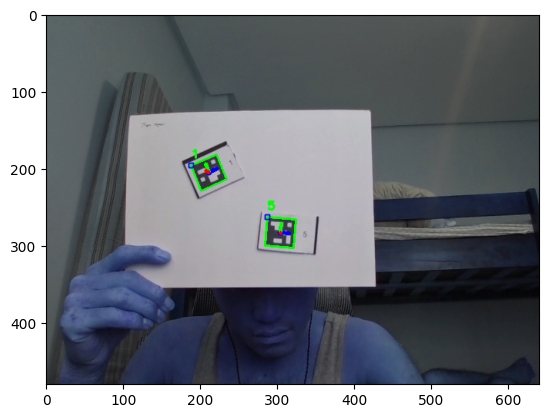

In [132]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [140]:
# Compute the Position of the Origin of Marker 5 relative to the Coordinate Frame of Marker 1

# temp = T_5_c * origin

temp_mat = np.matmul(T_5_c,np.array([0.0,0.0,0.0,1.0]).reshape(4,1))

# T_1_c inverse * T_5_c

origin5_in_marker1 = np.matmul(np.linalg.inv(T_1_c), temp_mat)

In [141]:
origin5_in_marker1

array([[ 0.04582727],
       [-0.08986201],
       [-0.00457034],
       [ 1.        ]])

In [135]:
np.matmul(np.linalg.inv(T_1_c), np.matmul(T_5_c,np.array([0.0,0.0,0.0,1.0]).reshape(4,1)))

array([[ 0.04582727],
       [-0.08986201],
       [-0.00457034],
       [ 1.        ]])

In [146]:
# Compute the Position of the Origin of Marker 1 in terms of the coordinate fram of marker1

# temp = T_1_c * origin

temp_mat = np.matmul(T_1_c,np.array([0.0,0.0,0.0,1.0]).reshape(4,1))

# T_5_c inverse * temp


origin1_in_marker5 = np.matmul(np.linalg.inv(T_5_c), temp_mat)

In [147]:
origin1_in_marker5

array([[-0.08246762],
       [ 0.05673607],
       [-0.01327845],
       [ 1.        ]])

## Visualizing the Pose in 3D

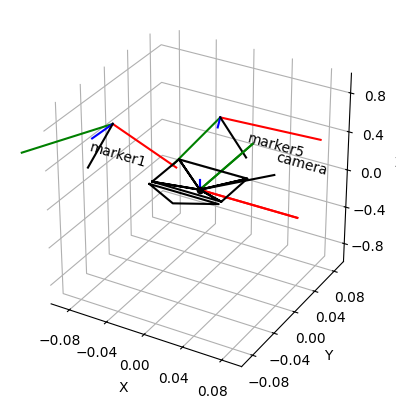

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d import rotations as pr
from pytransform3d import transformations as pt
import pytransform3d.camera as pc
from pytransform3d.transform_manager import TransformManager


rng = np.random.default_rng(0)

marker5_to_cam = T_5_c
marker1_to_cam = T_1_c

tm = TransformManager()
cam2world = camera_to_world
sensor_size = np.array([0.036, 0.024])
intrinsic_matrix = np.array([
    [0.05, 0, sensor_size[0] / 2.0],
    [0, 0.05, sensor_size[1] / 2.0],
    [0, 0, 1]
])

virtual_image_distance = 0.1
tm.add_transform("marker5", "camera", marker5_to_cam)
tm.add_transform("marker1", "camera", marker1_to_cam)
# tm.add_transform("camera", "world", camera_to_world)

# ee2object = tm.get_transform("end-effector", "object")
ax = pt.plot_transform(A2B=cam2world, s=0.1)
ax = tm.plot_frames_in("camera", s=0.1)
ax.set_xlim((-0.10, 0.10))
ax.set_ylim((-0.10, 0.10))
pc.plot_camera(ax, cam2world=cam2world, M=intrinsic_matrix, sensor_size=sensor_size,
virtual_image_distance=virtual_image_distance)
plt.show()

In [151]:
ee2robot

array([[-0.85361172, -0.43041808,  0.2934064 ,  0.4       ],
       [-0.31431799,  0.87475609,  0.3687899 , -0.3       ],
       [-0.41539287,  0.22258047, -0.88199019,  0.5       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])